# A Simple Guide to Beautiful Visualizations in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ahora podemos establecer fácilmente de forma global el estilo del gráfico y el tamaño de fuente con el siguiente código.  

```pyhton
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
```  

Primero, usamos ```sns.set_style ()``` para establecer el estilo del gráfico. Esto hará que los gráficos de Matplotlib y Seaborn se vean mejor por defecto. Luego usamos ```plt.rc ()``` para personalizar el tamaño de fuente del texto que se muestra en los gráficos.

## Customization of Plots  
### Color Palettes

Estas son algunas de las paletas que tiene Seaborn.
``` python
sns.set_palette(‘deep’)
sns.color_palette(‘pastel’)
sns.color_palette(‘Set2’)
sns.set_palette(‘deep’)[0]
```  
Estas paletas tienen la forma de una lista, por lo que en lugar de usar la "b" clásica para obtener el color azul, puede extraer el color de estas paletas haciendo ```sns.color_palette('deep')[0]```. Si ejecuta este código, obtendrá un código RGB como este (0.298, 0.447, 0.690), que se acepta en el parámetro de color en los gráficos de Matplotlib. Comprobaremos esto mejor al crear las parcelas.

## Figure size, figure appearance, title, and axes labels  

Al crear gráficos, la mayor parte del tiempo necesitaremos hacer algunos ajustes, para que cualquiera pueda entender fácilmente nuestras visualizaciones. Los siguientes métodos se utilizarán repetidamente a lo largo de los gráficos presentados en este artículo, así que acostumbrámonos a ellos.  

**¿Cómo ajustar el tamaño de la figura?** Para ajustar el tamaño de la figura usamos ```plt.figure (figsize)```. También usaremos ```tight_layout = True``` para limpiar el relleno en una parcela o entre subtramas.
```pyhton
plt.figure (figsize = (8,4), tight_layout = True)
```

**¿Cómo editar la apariencia de la figura?**  Algunos de los ajustes básicos que haremos en el gráfico son el color y el ancho de línea. Se incluyen como parámetros adicionales al trazar.  
```python
# matplotlib
plt.hist(..., color=sns.color_palette('Set2')[2], linewidth=2)
# seaborn
ax = sns.histplot(..., palette='Set2', linewidth=2) # seaborn will have either the color or palette parameters available (it depends on the plot)
```

**¿Cómo agregar subparcelas (parcelas lado a lado)?** Necesitaremos ```plt.subplots()``` para hacer gráficos uno al lado del otro.  
```python
#subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5), tight_layout=True)
```  
Después de crear subtramas, usaremos ejes unidimensionales ```ax[0]``` o ejes bidimensionales ```ax[0][0]```

**Cómo agregar etiqueta y título a la trama?** Agregar etiquetas a los ejes y configurar los nombres de los títulos es similar entre Matplotlib ```plt.xlabel()``` y Seaborn ```ax.set_xlabel()```, pero prefiero usar la variante ```ax.set()``` en Seaborn porque se encarga de la mayoría de los parámetros en una línea.

## Exercise

In [4]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [2]:
df = pd.read_csv('players_20.csv')

In [5]:
country = ['United States', 'Canada', 'England', 'Brazil', 'Argentina']
df_country = df[df['nationality'].isin(countryry)]

In [7]:
df_country.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+6,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+6,61+6,61+6,61+6,67+6,61+6,47+6,47+6,47+6,61+6
12,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,66+3,66+3,66+3,65+3,62+3,61+3,61+3,61+3,62+3
13,212831,https://sofifa.com/player/212831/alisson-ramse...,Alisson,Alisson Ramsés Becker,26,1992-10-02,191,91,Brazil,Liverpool,...,31+3,35+3,35+3,35+3,31+3,30+3,30+3,30+3,30+3,30+3
17,153079,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,1988-06-02,173,70,Argentina,Manchester City,...,61+3,58+3,58+3,58+3,61+3,57+3,51+3,51+3,51+3,57+3


In [8]:
df_country.shape

(3801, 106)

### Barplot

In [9]:
barplot = df_country.groupby(['nationality'], as_index=False).mean()[['nationality', 'overall']]
barplot

,nationality,overall
0,Argentina,69.118510
1,Brazil,71.143894
2,Canada,62.855072
3,England,63.253293
4,United States,64.538682


In [167]:
plt.figure(figsize=(8,4), tight_layout = True)
sns.color_palette(‘deep’)
colors = sns.color_palette('pastel')
plt.bar(barplot['nationality'], barplot['overall'],color=colors[:5])


plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-167-841df0a0a046>, line 2)

### Barplot seaborn

In [37]:
sns_barplot = df_country['nationality'].value_counts().reset_index()
sns_barplot.columns = ['nationality', 'values']
sns_barplot

,nationality,values
0,England,1670
1,Argentina,886
2,Brazil,827
3,United States,349
4,Canada,69


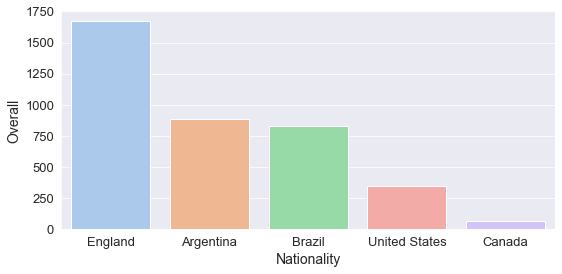

In [39]:
plt.figure(figsize=(8,4), tight_layout = True)
sns.barplot(x = 'nationality', y = 'values',data= sns_barplot, palette='pastel', ci=None)
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.show()

In [54]:
england = df_country[df_country['nationality']=='England'][['nationality', 'overall']].head(20)
argentina = df_country[df_country['nationality']=='Argentina'][['nationality', 'overall']].head(20)
brazil = df_country[df_country['nationality']=='Brazil'][['nationality', 'overall']].head(20)
us = df_country[df_country['nationality']=='United States'][['nationality', 'overall']].head(20)
canada = df_country[df_country['nationality']=='Canada'][['nationality', 'overall']].head(20)

In [55]:
countries = pd.concat([england, argentina, brazil, us, canada], axis=0)
countries.shape

(100, 2)

In [56]:
new_barplot = countries.groupby(['nationality'], as_index=False)['overall'].mean()
new_barplot

,nationality,overall
0,Argentina,83.80
1,Brazil,85.85
2,Canada,70.55
3,England,82.60
4,United States,75.25


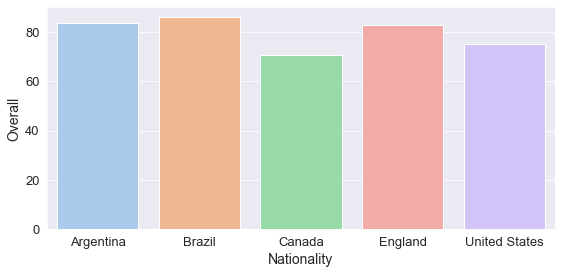

In [57]:
plt.figure(figsize=(8,4), tight_layout = True)
sns.barplot(x = 'nationality', y = 'overall',data= new_barplot, palette='pastel', ci=None)
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.show()

In [59]:
df_country.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club_name',
 'league_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed

In [60]:
df_country['league_name'].unique()

array(['Spain Primera Division', 'French Ligue 1',
       'English Premier League', 'Italian Serie A',
       'German 1. Bundesliga', 'Portuguese Liga ZON SAGRES',
       'Chinese Super League', 'Campeonato Brasileiro Série A',
       'Holland Eredivisie', 'Saudi Abdul L. Jameel League',
       'Rest of World', 'Argentina Primera División',
       'USA Major League Soccer', 'Mexican Liga MX', 'Turkish Süper Lig',
       'English League Championship', 'Colombian Liga Postobón',
       'Japanese J. League Division 1', 'German 2. Bundesliga',
       'Scottish Premiership', 'Austrian Football Bundesliga',
       'Chilian Campeonato Nacional', 'Spanish Segunda División',
       'Belgian Jupiler Pro League', nan, 'Italian Serie B',
       'Romanian Liga I', 'Swedish Allsvenskan',
       'Korean K League Classic', 'Swiss Super League',
       'Danish Superliga', 'Polish T-Mobile Ekstraklasa',
       'English League One', 'Australian Hyundai A-League',
       'English League Two', 'Norwegian E

In [61]:
liga = ['Spain Primera Division', 'Italian Serie A','German 1. Bundesliga' ]
df_ligas = df_country[df_country['league_name'].isin(liga)][['nationality','league_name' ]]
df_ligas.head()

,nationality,league_name
0,Argentina,Spain Primera Division
23,Argentina,Italian Serie A
42,Brazil,Spain Primera Division
68,Brazil,German 1. Bundesliga
91,Brazil,Spain Primera Division


In [76]:
b2 =df_ligas.groupby(['nationality', 'league_name'], as_index=False).size()
b2

,nationality,league_name,size
0,Argentina,German 1. Bundesliga,3
1,Argentina,Italian Serie A,26
2,Argentina,Spain Primera Division,25
3,Brazil,German 1. Bundesliga,13
4,Brazil,Italian Serie A,40
5,Brazil,Spain Primera Division,23
6,Canada,German 1. Bundesliga,2
7,England,German 1. Bundesliga,6
8,England,Italian Serie A,1
9,England,Spain Primera Division,1


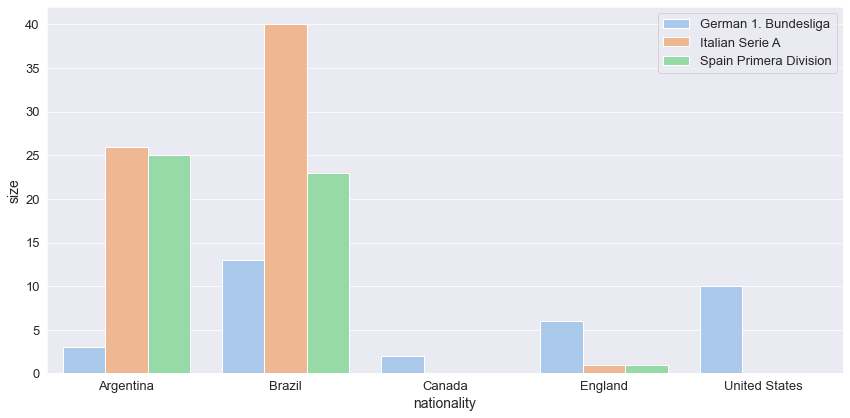

In [78]:
plt.figure(figsize=(12, 6), tight_layout=True)
sns.barplot(x = 'nationality', y = 'size', data = b2, hue = 'league_name')
plt.legend(loc = 'upper right')
plt.show()

## Histogram  
```Plt.hist()``` de MatplotLib y ```sns.histplot()``` de Seaborn funcionan igual. Ambos necesitan dos argumentos: el nombre de la variable numérica (altura) y el número o lista de contenedores. En este caso, hicimos una lista de bins llamados ```bins``` que se mostrarán en el eje x.

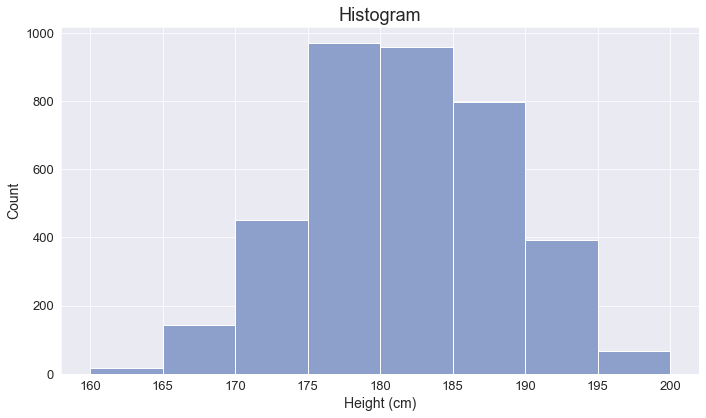

In [84]:
#matplotlib

plt.figure(figsize=(10,6), tight_layout=True)
bins = [160, 165, 170, 175, 180, 185, 190, 195, 200]
colors = sns.color_palette('Set2')[2]
plt.hist(df_country['height_cm'], bins=bins, color=colors)

plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

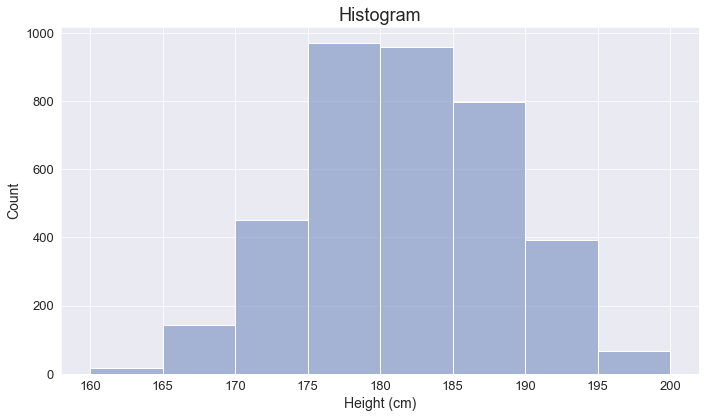

In [87]:
plt.figure(figsize=(10,6), tight_layout=True)
colors = sns.color_palette('Set2')[2]
sns.histplot(data = df_country, x = 'height_cm', bins=bins, color=colors)
plt.title('Histogram')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

## Boxplot

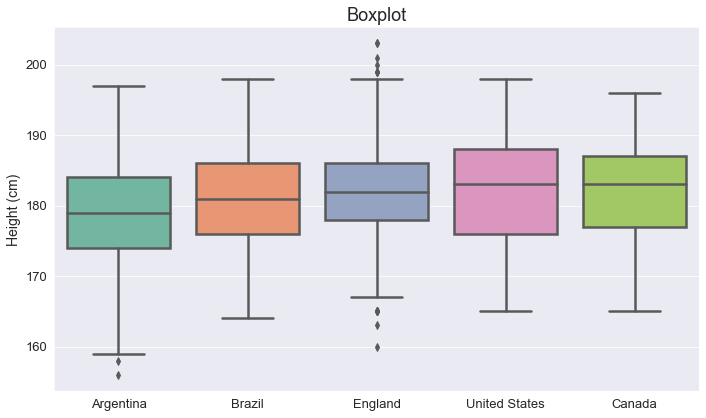

In [89]:
plt.figure(figsize=(10,6), tight_layout=True)
ax =sns.boxplot(data = df_country, x = 'nationality' , y = 'height_cm', palette='Set2', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Height (cm)')
plt.show()

## Scatter plot

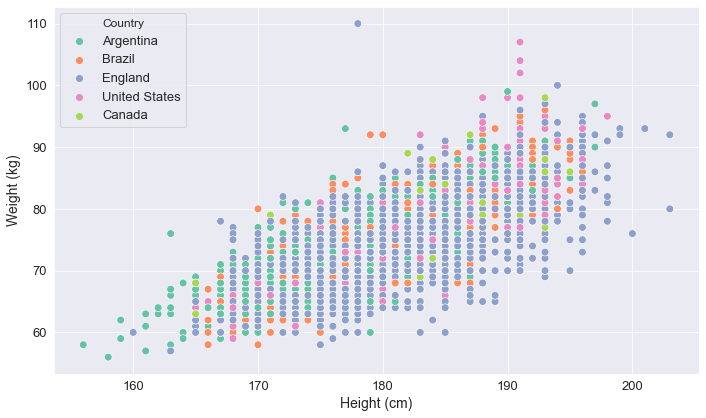

In [91]:
plt.figure(figsize=(10,6), tight_layout=True)
ax =sns.scatterplot(data = df_country, x = 'height_cm' , y = 'weight_kg', hue= 'nationality', palette='Set2',
                   s= 60)
ax.set(xlabel='Height (cm)', ylabel='Weight (kg)')
ax.legend(title='Country',title_fontsize = 12)
plt.show()

## Piechart + Subplots  
### Single Piechart

In [110]:
chelsea = df[df['club_name']=='Chelsea'][['short_name', 'value_eur']].sort_values(by='value_eur', ascending=False)
chelsea =chelsea[:11]

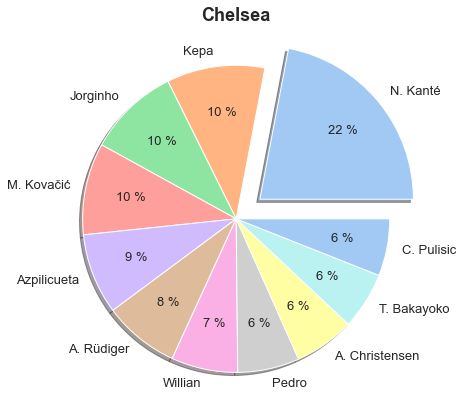

In [115]:
colors = sns.color_palette('pastel')
plt.figure(figsize=(7, 6), tight_layout=True)
explode_list = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(chelsea['value_eur'], labels=chelsea['short_name'],
       autopct='%.0f %%',  pctdistance=.7,
          colors=colors, shadow=True, explode= explode_list)
plt.title('Chelsea', weight='bold')
plt.show()

### Piechart side by side (subplots)

In [120]:
pie2 = df[df['nationality']=='United States'][['short_name', 'value_eur']].sort_values(by='value_eur', ascending=False)
pie2 = pie2[:11]
pie2

,short_name,value_eur
584,C. Pulisic,18000000
630,J. Brooks,14000000
1269,W. McKennie,12500000
1266,T. Adams,11500000
1688,T. Boyd,9000000
1294,Z. Steffen,8500000
1372,D. Yedlin,8500000
1734,A. Long,8000000
1471,J. Altidore,7500000
1479,F. Johnson,7000000


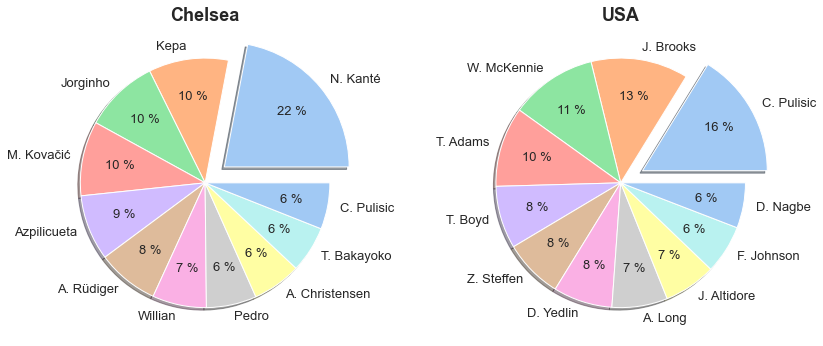

In [123]:
#subplots
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 5), tight_layout=True)
colors = sns.color_palette('pastel')
explode_list = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

ax[0].pie(chelsea['value_eur'], labels=chelsea['short_name'],
       autopct='%.0f %%',  pctdistance=.7,
          colors=colors, shadow=True, explode= explode_list)
ax[0].set_title('Chelsea', weight='bold')


ax[1].pie(pie2['value_eur'], labels=pie2['short_name'],
       autopct='%.0f %%',  pctdistance=.7,
          colors=colors, shadow=True, explode= explode_list)
ax[1].set_title('USA', weight='bold')

plt.show()

## Line Plot

In [124]:
# read datsets
player_17 = pd.read_csv('players_17.csv')
player_18 = pd.read_csv('players_18.csv')
player_19 = pd.read_csv('players_19.csv')
player_20 = pd.read_csv('players_20.csv')
player_21 = pd.read_csv('players_21.csv')

In [125]:
# crear la column year al nuevo conjunto de datos
frames = [player_17, player_18, player_19, player_20, player_20]
for i, frame in enumerate(frames):
    frame['year'] = 2017 + i    

In [135]:
lime_plot = pd.concat(frames)[['short_name', 'overall', 'year']]
lime_plot.head()

,short_name,overall,year
0,Cristiano Ronaldo,94,2017
1,L. Messi,93,2017
2,Neymar,92,2017
3,M. Neuer,92,2017
4,L. Suárez,92,2017


In [136]:
lime_plot.year.unique()

array([2017, 2018, 2019, 2021], dtype=int64)

In [157]:
list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
line_plot =lime_plot[lime_plot['short_name'].isin(list_players)]
line_plot.head()

,short_name,overall,year
0,Cristiano Ronaldo,94,2017
1,L. Messi,93,2017
18,K. De Bruyne,88,2017
561,V. van Dijk,79,2017
0,Cristiano Ronaldo,94,2018


In [160]:
line = line_plot.pivot_table(index='short_name', columns='year', values= 'overall').T
line

short_name,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
year,,,,,
2017,94.0,88.0,NaN,93.0,79.0
2018,94.0,89.0,83.0,93.0,83.0
2019,94.0,91.0,87.0,94.0,85.0
2021,93.0,91.0,89.0,94.0,90.0


In [162]:
line.reset_index(inplace=True)
line.set_index('year', inplace=True)
line

short_name,Cristiano Ronaldo,K. De Bruyne,K. Mbappé,L. Messi,V. van Dijk
year,,,,,
2017,94.0,88.0,NaN,93.0,79.0
2018,94.0,89.0,83.0,93.0,83.0
2019,94.0,91.0,87.0,94.0,85.0
2021,93.0,91.0,89.0,94.0,90.0


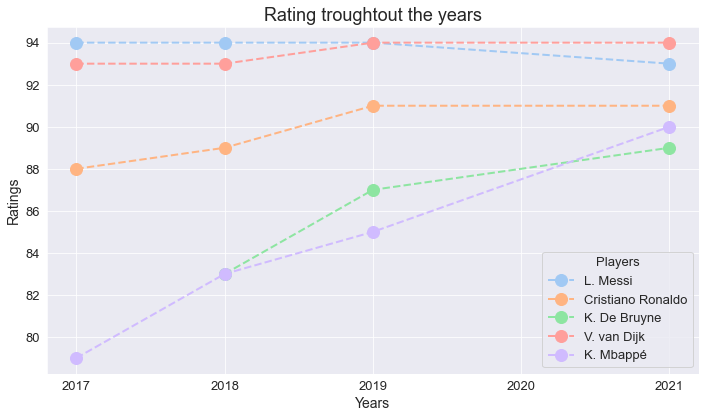

In [170]:
# Matplotlib
plt.figure(figsize=(10,6), tight_layout=True)
plt.plot(line, marker='o', linestyle='dashed',linewidth=2, markersize=12)


#customization
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13, 
           labels=['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'V. van Dijk', 'K. Mbappé'])

plt.show()

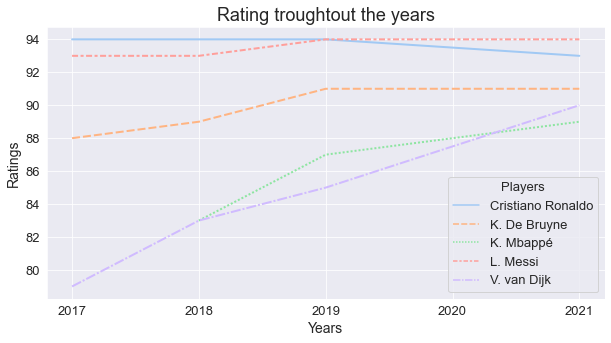

In [173]:
# Seaborn

plt.figure(figsize=(10,5))
ax = sns.lineplot(data = line, linewidth=2)

#customization
ax.set(xlabel= 'Years', ylabel= 'Ratings', title = 'Rating troughtout the years', xticks = [2017, 2018, 2019, 2020, 2021])
ax.legend(title='Players', title_fontsize = 13)

plt.show()